<a href="https://colab.research.google.com/github/sujitojha1/ERA1/blob/main/Session10/ERA1_S10_CIFAR10_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Models & Modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/abhilashreddyy/LearnDeepLearning/ -q --quiet
!mv LearnDeepLearning/S10-Assignment-Solution/*.py ./
!rm -rf LearnDeepLearning
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet
!pip install torch-lr-finder -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded Modules and Models
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

# Loading train and test data with transforms and loader functions

In [3]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=512)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True


100%|██████████| 170498071/170498071 [00:03<00:00, 43110721.91it/s]


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


# Exploratory Data Analysis

## Summary Statistics

In [4]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
Number of Images :  (60000, 32, 32, 3)
Dataset Mean :  [0.49186878 0.48265391 0.44717728]
Dataset Standard Deviation :  [0.24697121 0.24338894 0.26159259]


## Plotting sample images

Files already downloaded and verified


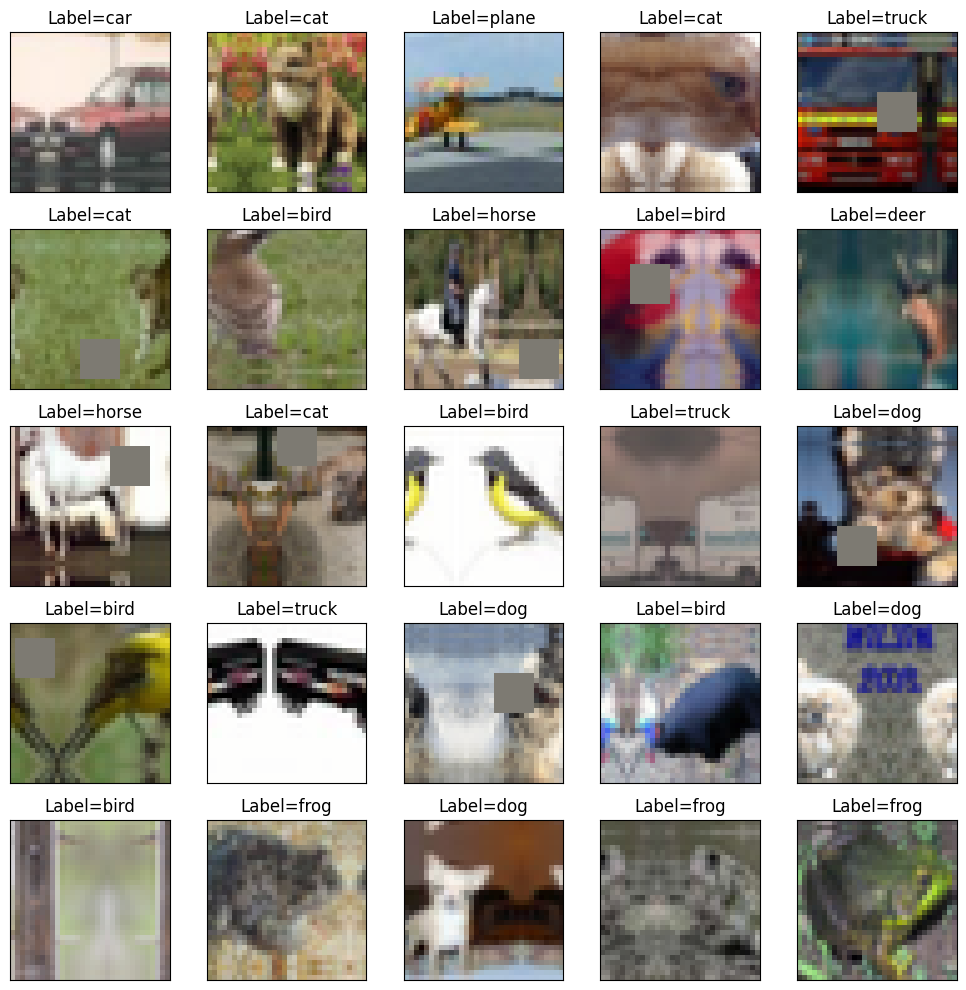

In [5]:
cifar10.sample_pictures(train_flag=True)

## Model

In [6]:
from custom_resnet import *

# Loading Custom Model

net = Net()
# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary

In [7]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

## LR Finder

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.26E-03


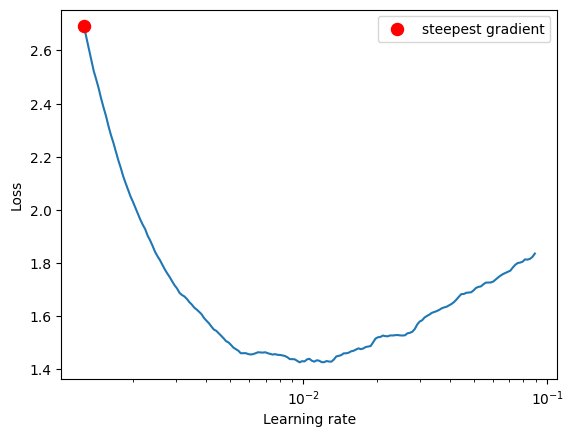

<Axes: xlabel='Learning rate', ylabel='Loss'>

In [8]:
import copy
from torch_lr_finder import LRFinder
import torch.nn as nn
import numpy as np

net_exp = copy.deepcopy(net)
optimizer = torch.optim.Adam(net_exp.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net_exp, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, end_lr=0.1, num_iter=200)
lr_finder.plot()

## Define a Loss function and optimizer

In [9]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01) #, momentum=0.85)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                                                max_lr=0.003,
                                                steps_per_epoch=len(trainloader),
                                                epochs=24,
                                                pct_start=0.2,
                                                div_factor=10,
                                                three_phase=False,
                                                final_div_factor=50,
                                                anneal_strategy='linear'
                                                ) #final_div_factor=100,

## Training & Testing

In [10]:
# Load train and test model
from main import train, test

train = train()
test = test()

EPOCHS= 24

for epoch in range(EPOCHS):  # loop over the dataset multiple times
  #train.execute(net, device, batch, optimizer, criterion, epoch)
  train.run(net, device, trainloader, optimizer, scheduler, criterion, epoch)
  test.execute(net, device, testloader, criterion)

print('Finished Training')

Epoch: 0,Loss=1.09 Batch_id=97 Accuracy=47.69: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]



Test set: Average loss: 0.0025, Accuracy: 5539/10000 (55.39%)



Epoch: 1,Loss=0.97 Batch_id=97 Accuracy=63.86: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]



Test set: Average loss: 0.0018, Accuracy: 6918/10000 (69.18%)



Epoch: 2,Loss=0.74 Batch_id=97 Accuracy=71.19: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.0017, Accuracy: 7132/10000 (71.32%)



Epoch: 3,Loss=0.63 Batch_id=97 Accuracy=75.18: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]



Test set: Average loss: 0.0012, Accuracy: 8015/10000 (80.15%)



Epoch: 4,Loss=0.71 Batch_id=97 Accuracy=77.68: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]



Test set: Average loss: 0.0015, Accuracy: 7615/10000 (76.15%)



Epoch: 5,Loss=0.60 Batch_id=97 Accuracy=80.43: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 0.0011, Accuracy: 8208/10000 (82.08%)



Epoch: 6,Loss=0.52 Batch_id=97 Accuracy=83.31: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 0.0009, Accuracy: 8466/10000 (84.66%)



Epoch: 7,Loss=0.44 Batch_id=97 Accuracy=84.40: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]



Test set: Average loss: 0.0011, Accuracy: 8174/10000 (81.74%)



Epoch: 8,Loss=0.34 Batch_id=97 Accuracy=86.03: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.0011, Accuracy: 8297/10000 (82.97%)



Epoch: 9,Loss=0.39 Batch_id=97 Accuracy=87.20: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]



Test set: Average loss: 0.0008, Accuracy: 8612/10000 (86.12%)



Epoch: 10,Loss=0.29 Batch_id=97 Accuracy=87.94: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.0009, Accuracy: 8558/10000 (85.58%)



Epoch: 11,Loss=0.33 Batch_id=97 Accuracy=89.30: 100%|██████████| 98/98 [00:22<00:00,  4.34it/s]



Test set: Average loss: 0.0008, Accuracy: 8559/10000 (85.59%)



Epoch: 12,Loss=0.34 Batch_id=97 Accuracy=90.20: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.0007, Accuracy: 8818/10000 (88.18%)



Epoch: 13,Loss=0.20 Batch_id=97 Accuracy=90.86: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]



Test set: Average loss: 0.0007, Accuracy: 8880/10000 (88.80%)



Epoch: 14,Loss=0.28 Batch_id=97 Accuracy=91.54: 100%|██████████| 98/98 [00:24<00:00,  4.04it/s]



Test set: Average loss: 0.0006, Accuracy: 9003/10000 (90.03%)



Epoch: 15,Loss=0.23 Batch_id=97 Accuracy=92.05: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 0.0006, Accuracy: 9010/10000 (90.10%)



Epoch: 16,Loss=0.20 Batch_id=97 Accuracy=92.94: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 0.0006, Accuracy: 9091/10000 (90.91%)



Epoch: 17,Loss=0.19 Batch_id=97 Accuracy=93.80: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 0.0006, Accuracy: 9095/10000 (90.95%)



Epoch: 18,Loss=0.16 Batch_id=97 Accuracy=94.30: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]



Test set: Average loss: 0.0006, Accuracy: 9119/10000 (91.19%)



Epoch: 19,Loss=0.12 Batch_id=97 Accuracy=94.70: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]



Test set: Average loss: 0.0006, Accuracy: 9119/10000 (91.19%)



Epoch: 20,Loss=0.14 Batch_id=97 Accuracy=95.36: 100%|██████████| 98/98 [00:23<00:00,  4.12it/s]



Test set: Average loss: 0.0005, Accuracy: 9208/10000 (92.08%)



Epoch: 21,Loss=0.15 Batch_id=97 Accuracy=95.81: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.0005, Accuracy: 9203/10000 (92.03%)



Epoch: 22,Loss=0.13 Batch_id=97 Accuracy=96.35: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]



Test set: Average loss: 0.0005, Accuracy: 9290/10000 (92.90%)



Epoch: 23,Loss=0.07 Batch_id=97 Accuracy=96.74: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]



Test set: Average loss: 0.0005, Accuracy: 9276/10000 (92.76%)

Finished Training


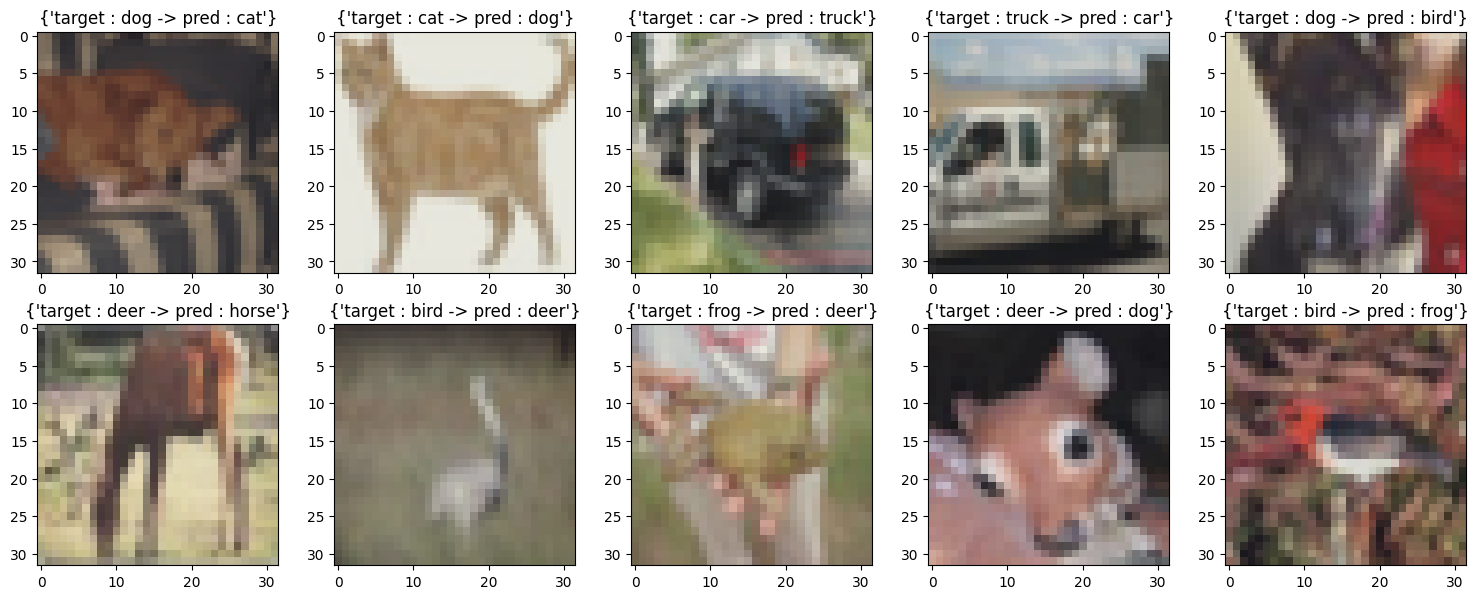

In [11]:
#collect misclassified images
import random

test.plt_misclassified_images()


In [12]:
test.test_losses
test.test_acc

[55.39,
 69.18,
 71.32,
 80.15,
 76.15,
 82.08,
 84.66,
 81.74,
 82.97,
 86.12,
 85.58,
 85.59,
 88.18,
 88.8,
 90.03,
 90.1,
 90.91,
 90.95,
 91.19,
 91.19,
 92.08,
 92.03,
 92.9,
 92.76]

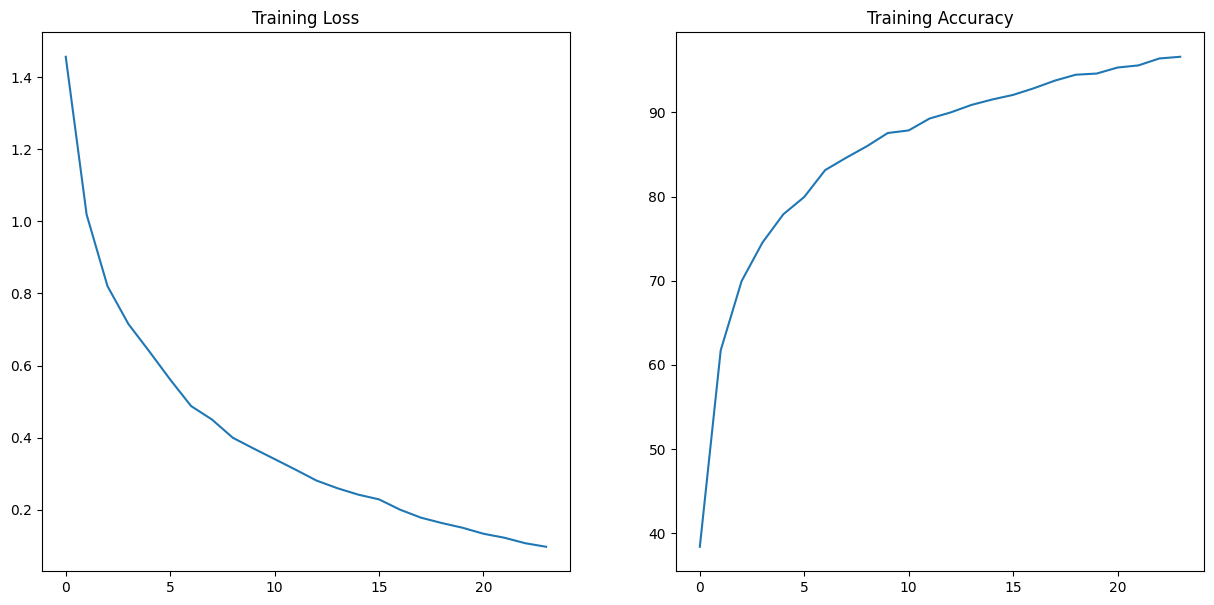

In [13]:
train.plot_trining_process()

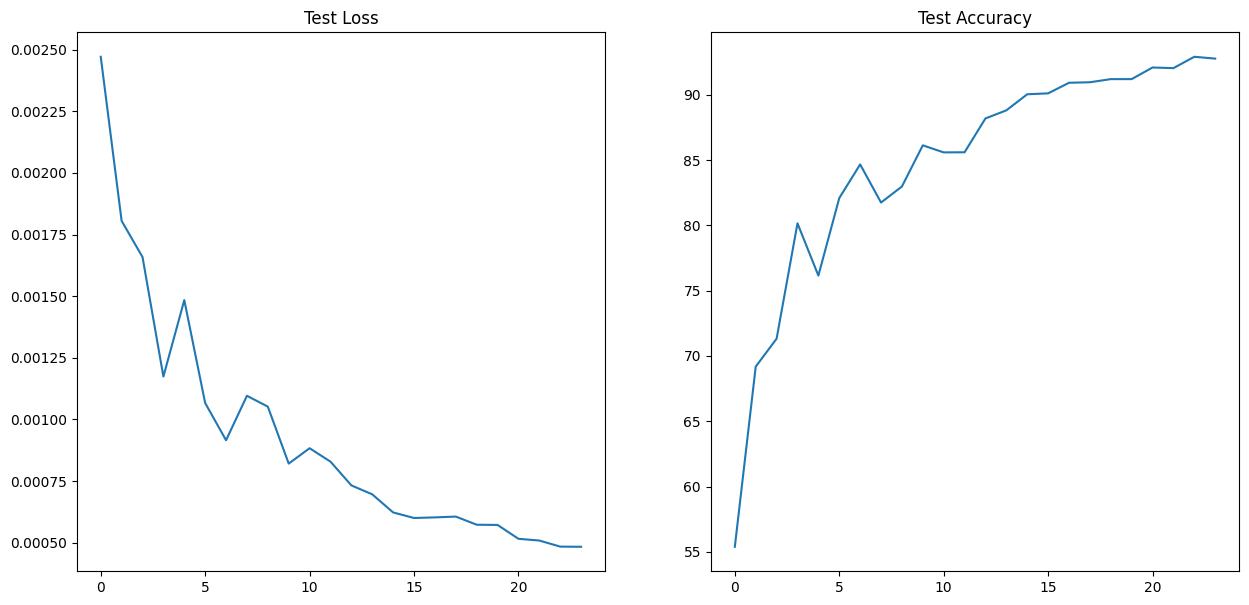

In [14]:
test.plot_test_process()